In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
output_df = pd.read_csv(r'C:\Users\davim\OneDrive\Documentos\Projects\GitHub\Trabalho-de-IA\trabalhoIA\outputs\results.csv')

In [7]:
output_df.head()

,algorithm,solution,depth,cost,expanded_nodes,visited_nodes,average_branching_factor,execution_time,result,n
0,Backtracking,'NorthKatherinehaven'->'Brittanytown'->'North...,17,541.338,17,18,1.0,0.000091,SUCCESS,25
1,Backtracking,'NorthKatherinehaven'->'Brittanytown'->'North...,17,541.338,17,18,1.0,0.000097,SUCCESS,25
2,Backtracking,'NorthKatherinehaven'->'Brittanytown'->'North...,17,541.338,17,18,1.0,0.000087,SUCCESS,25
3,Backtracking,'NorthKatherinehaven'->'Brittanytown'->'North...,17,541.338,17,18,1.0,0.000163,SUCCESS,25
4,Backtracking,'NorthKatherinehaven'->'Brittanytown'->'North...,17,541.338,17,18,1.0,0.000150,SUCCESS,25


In [31]:
grouped = output_df[['algorithm', ' depth', ' cost', ' expanded_nodes',
       ' visited_nodes', ' average_branching_factor', ' execution_time',
       ' n']].groupby(['algorithm', ' n']).mean()
grouped.reset_index(inplace = True)
grouped

,algorithm,n,depth,cost,expanded_nodes,visited_nodes,average_branching_factor,execution_time
0,Astar,25,7,260.778,21,25,2.142857,0.000346
1,Astar,50,11,2139.695,32,42,2.312500,0.000538
2,Astar,100,16,4046.594,66,79,2.272727,0.000809
3,BFS,25,7,302.152,21,25,4.095238,0.000132
4,BFS,50,9,2347.273,45,49,4.022222,0.000238
5,BFS,100,13,4381.042,87,88,4.103448,0.000744
6,Backtracking,25,17,541.338,17,18,1.000000,0.000118
7,Backtracking,50,19,4199.785,20,21,1.000000,0.000113
8,Backtracking,100,24,8267.924,70,71,1.000000,0.001017
9,DFS,25,9,290.479,38,24,4.657895,0.000237


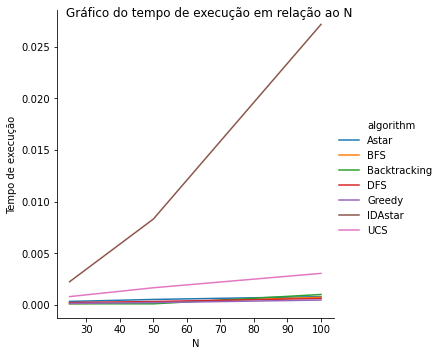

In [100]:
g = sns.relplot(x = " n", y = ' execution_time', data = grouped, hue = 'algorithm', kind = "line")
g.set_axis_labels("N", "Tempo de execução")
g.fig.suptitle('Gráfico do tempo de execução em relação ao N')
g.savefig(r'C:\Users\davim\OneDrive\Documentos\Projects\GitHub\Trabalho-de-IA\notebooks\outputs\execution_time1.png')

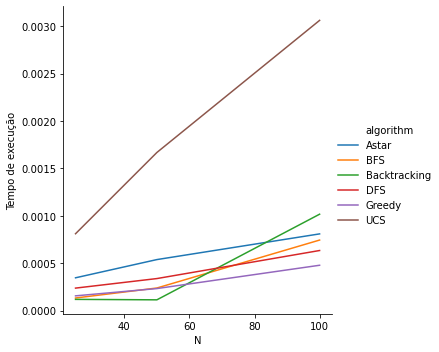

In [104]:
g = sns.relplot(x = " n", y = ' execution_time', data = grouped.query("algorithm != 'IDAstar'"), hue = 'algorithm', kind = "line")
g.set_axis_labels("N", "Tempo de execução")
# g.fig.suptitle('Gráfico do tempo de execução em relação ao N')
g.savefig(r'C:\Users\davim\OneDrive\Documentos\Projects\GitHub\Trabalho-de-IA\notebooks\outputs\execution_time2.png')

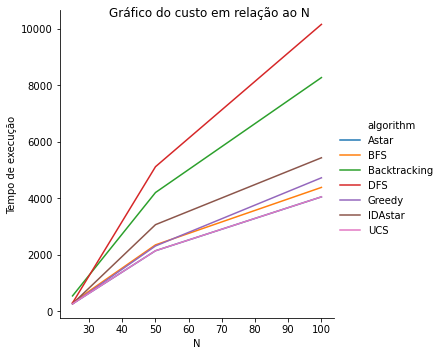

In [103]:
g = sns.relplot(x = " n", y = ' cost', data = grouped, hue = 'algorithm', kind = "line")
g.set_axis_labels("N", "Tempo de execução")
g.fig.suptitle('Gráfico do custo em relação ao N')
g.savefig(r'C:\Users\davim\OneDrive\Documentos\Projects\GitHub\Trabalho-de-IA\notebooks\outputs\cost1.png')

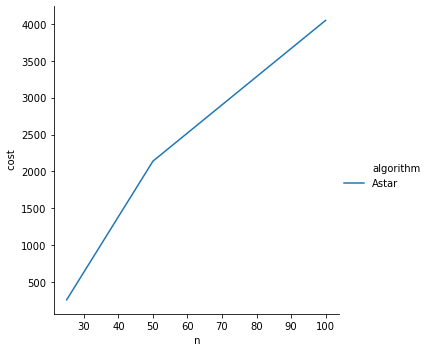

In [89]:
sns.relplot(x = " n", y = ' cost', data = grouped.query("algorithm == 'Astar'"), hue = 'algorithm', kind = "line")

In [90]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


AttributeError: 'FacetGrid' object has no attribute 'tight_layout'

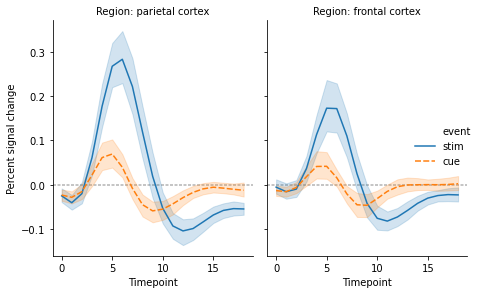

In [91]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=4, aspect=.7, kind="line"
)
(g.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Timepoint", "Percent signal change")
  .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=0))